## Algorítmos Genéticos

Los algorítmos genéticos son técnicas de optimización metaheuristicas, tambien llamadas estocasticas o probabilisticas.

La idea principal detras de este concepto es realizar una busqueda guiada a partir de un conjunto inicial de posibles soluciones (**Población inicial**) el cual va evolucionando a mejor en cada iteración del algoritmo (**generacion**). La última generación incluye la mejor o las mejores soluciones a nuestro problema de optimización. Cada posible solución a nuestro problema se le conoce como **individuo** y cada individuo codifica las **variables independientes** de nuestro problema de optimización

Los individuos son potenciales soluciones del problema y la adaptación al medio de estos se mide mediante la función que queremos optimizar (**fitness funcition**). 

>Un individuo se adaptará bien al medio si produce un desempeño o fitness alfot en problemas de donde se busca maximizar la función, o si produce un bajo desempeño en problemas de minimización

En cada iteración del algoritmo, nuevos individuos son creados mediante operaciones genéticas, dando lugar a nuevas poblaciones. Dichas operaciones se pueden resumir en:

- Selección
- Cruce
- Mutación

Estas operaciones son el motor de búsqueda del algorítmo genético

### ¿Por qué recurrir a la optimización metaheurística?

En todo proceso de optimización matemática surge el siguiente dilema: ¿debemos aplicar métodos de resolución exactos (**analíticos**) o métodos aproximados (**metaheurísticos**)?

La diferencia es clara: mientras los primeros proporcionan soluciones cuasi-exactas al problema, los segundos únicamente ofrecen aproximaciones cercanas al valor óptimo real. Entonces, ¿por qué optar por estos últimos? La respuesta principal es **practicidad**. Con frecuencia, la complejidad o el tamaño de los problemas hace inviable aplicar métodos exactos debido a los altos requerimientos computacionales.

Además, los métodos analíticos clásicos, como el conocido **Descenso de Gradiente**, presentan limitaciones importantes: pueden estancarse en mínimos locales y no garantizar la obtención de la solución óptima global.

Por ello, al elegir una estrategia de resolución conviene reflexionar al menos sobre las siguientes cuestiones:

1. ¿Qué tan grande o complejo es mi problema?
2. ¿De cuánto tiempo dispongo para resolverlo?
3. ¿Cuántas restricciones existen y qué características tienen?
4. ¿Qué nivel de precisión requieren los resultados?

### Esquema general de un algoritmo genético

#### 1. Definición del problema y generación de la población inicial

En este primer punto se definen aspectos muy relevantes del algoritmo genético, tales como:

- El **tipo de problema** de optimización (maximización vs minimización)
- Tipo de *objeto* de python o **plantilla** que va a contener el individuo y sus **atributos**
- **Toolbox** que contendrá (conjunto de funciones utilizadas por el algoritmo durante su ejecución). Entre estas funciones caben destacar:
    - La función para **crear los individuos** de forma **aleatoria**
    - La función para **crear la población**
    - Los operadores genéticos (**selección, cruce o *crossover* y mutación**)
    - La funció **objetivo**



In [1]:
# =========================
# Importación de librerías
# =========================

# 'random' se usa para generar números aleatorios (inicialización, mutación, etc.)
import random

# DEAP se organiza en "bloques" reutilizables: base (núcleo), creator (tipos), tools (operadores)
from deap import base
from deap import creator
from deap import tools


# ============================================================
# 1. Creación de los objetos para definir el problema y el individuo
# ============================================================

# 1.1 Definimos el problema

# En DEAP, 'creator.create' define NUEVOS tipos/clases a partir de otros existentes.
# Aquí creamos un tipo de fitness llamado "FitnessMax" que HEREDA de base.Fitness.
# 'weights=(1.0,)' indica que queremos MAXIMIZAR una única métrica (peso positivo).
#   - Si quisiéramos minimizar, usaríamos weights=(-1.0,)
#   - Si tuviéramos varias métricas, pondríamos varios pesos (uno por objetivo).
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# En creator.create debemos definir el tipo de problema y el nº de objetivos de este

# 1.2 Creación de la plantilla del individuo

# Se crea la clase que va a encapsular al individuo del problema
# Creamos un tipo "Individual" que HEREDA de 'list' y añade un atributo 'fitness'
# del tipo que acabamos de crear (creator.FitnessMax).
#   - Esto hace que cada individuo sea básicamente una lista con un campo .fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

# 1.3 Creación del toolbox para registrar los métodos necesarios para resolver el problema

# El 'Toolbox' es un contenedor donde registramos "fábricas" (funciones) para crear genes,
# individuos, poblaciones y para aplicar operadores (selección, cruce, mutación, etc.).
toolbox = base.Toolbox()


# =====================
# Generación de genes
# =====================

# Registramos en el toolbox una función llamada "attr_uniform" que, al llamarse,
# devuelve un número real uniforme en el rango [-100, 100].
#   - Esta función será nuestro "generador de genes".
#   - El primer argumento es el nombre con el que la registramos,
#     el segundo es la función original (random.uniform),
#     y los siguientes son los parámetros por defecto de esa función.
toolbox.register("attr_uniform", random.uniform, -100, 100)


# ======================================
# Generación de individuo y población
# ======================================

# Registramos una "toolbox" de individuos:
#   - tools.initRepeat construye una estructura repitiendo una "fábrica" de elementos.
#   - Aquí: crea un 'creator.Individual' repitiendo 'toolbox.attr_uniform' 2 veces.
#     Es decir, un individuo será una lista de longitud 2 con valores ~ U[-100, 100].
toolbox.register("individual",
                 tools.initRepeat,          # función generadora genérica
                 creator.Individual,        # tipo destino (nuestra clase Individual)
                 toolbox.attr_uniform,      # fábrica de genes (un real uniforme)
                 2)                         # número de genes (x, y)

# Registramos una "toolbox" de poblaciones:
#   - Crea una lista Python estándar repitiendo la fábrica 'toolbox.individual' 30 veces.
#   - Resultado: una población de 30 individuos, cada uno con 2 genes.
toolbox.register("population",
                 tools.initRepeat,  # generador genérico
                 list,              # tipo destino (lista normal)
                 toolbox.individual,# fábrica de individuos
                 30)                # tamaño poblacional

# Regla básica (que no universal) - El tamaño de la población debe ser, al menos 1 orden de
# magnitud superior al número de variables independientes

# ============================
# Instanciación (uso real)
# ============================

# Creamos UN individuo llamando a la toolbox registrada.
individuo = toolbox.individual()

# Creamos UNA población completa llamando a la toolbox registrada.
poblacion = toolbox.population()


In [2]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema.

    - Recibe un individuo 'x', que en este caso es una lista de dos genes [x0, x1].
    - Calcula la distancia al origen: sqrt(x0^2 + x1^2).
    - Devuelve una TUPLA (res,) porque DEAP espera que la función de evaluación
      siempre retorne un objeto iterable (tupla/lista), incluso para un único valor.
    """

    # Comprobamos que cada gen esté dentro del rango [-100, 100].
    # Si alguno se sale, devolvemos un fitness inválido (-1).
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,

    # Calculamos la función objetivo: distancia euclídea al origen
    res = math.sqrt(x[0]**2 + x[1]**2)

    # Devolvemos el resultado como tupla (DEAP lo exige así)
    return res,


# ======================================
# Registro de las operaciones genéticas
# ======================================

# Registro de la función de evaluación:
#   - toolbox.evaluate se convierte en la función que DEAP usará para calcular
#     el fitness de cada individuo.
toolbox.register("evaluate", funcion_objetivo)

# Registro del operador de CRUZAMIENTO:
#   - tools.cxOnePoint realiza un cruce de un punto en listas.
#   - Divide a los padres en un punto aleatorio y combina sus genes.
toolbox.register("mate", tools.cxOnePoint)

# Registro del operador de MUTACIÓN:
#   - tools.mutGaussian aplica mutación gaussiana (ruido normal) a los genes.
#   - mu=0     → media de la distribución gaussiana.
#   - sigma=5  → desviación estándar (cuánto puede variar el gen).
#   - indpb=0.1 → probabilidad independiente de mutar cada gen (10%).
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)

# Registro del operador de SELECCIÓN:
#   - tools.selTournament selecciona individuos mediante torneos.
#   - tournsize=3 → en cada torneo compiten 3 individuos y se elige el mejor.
toolbox.register("select", tools.selTournament, tournsize=3)


In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_evolucion(logs, fill="iqr"):
    """
        Agrega múltiples logbooks y dibuja:
          - curva promedio de min, avg y max por generación
          - banda de dispersión (IQR p25–p75 o min–max, según 'fill')
        logs: lista de objetos Logbook (uno por corrida)
        fill: "iqr" para p25–p75, "minmax" para banda min–max, o None para sin banda
    """

    # Extraemos los datos de interés del logbook:
    # IMPORTANTE -> Asegura arrays NumPy para operaciones vectorizadas y shapes consistentes
    # Asegura que todas las corridas tengan el mismo número de generaciones
    gens = np.asarray(logs[0].select("gen"))      # Número de generación
    mins = np.vstack([np.asarray(log.select("min"), dtype=float) for log in logs]) # Valor mínimo de fitness por generación
    maxs = np.vstack([np.asarray(log.select("max"), dtype=float) for log in logs]) # Valor máximo de fitness por generación
    avgs = np.vstack([np.asarray(log.select("avg"), dtype=float) for log in logs])  # Valor promedio de fitness por generación

    mean_min = mins.mean(axis=0)
    mean_avg = avgs.mean(axis=0)
    mean_max = maxs.mean(axis=0)
    
    # Creamos una figura y un eje para graficar
    fig, ax1 = plt.subplots()

    # Dibujamos las curvas:
    ax1.plot(gens, mean_min, 'b', label="Min")   # línea azul: fitness mínimo
    ax1.plot(gens, mean_max, 'r', label="Max")   # línea roja: fitness máximo
    ax1.plot(gens, mean_avg, '--k', label="Avg")  # línea negra discontinua: fitness promedio
    
    # Rellenamos el área entre min y max para dar una idea de la dispersión
    if fill == "iqr":
        p25 = np.percentile(avgs, 25, axis=0)
        p75 = np.percentile(avgs, 75, axis=0)
        ax1.fill_between(gens, p25, p75, alpha=0.2, facecolor='g', label="Avg IQR (25–75%)")
    elif fill == "minmax":
        gmin = avgs.min(axis=0)
        gmax = avgs.max(axis=0)
        ax1.fill_between(gens, gmin, gmax, alpha=0.15, facecolor='g', label="Avg min–max")

    # Etiquetas y formato
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")          
    ax1.set_ylim([-10, 160])           # ajusta los límites del eje Y (según tu problema)
    ax1.legend(loc="lower left")     
    plt.grid(True)

    # Mostrar gráfico en pantalla
    plt.show()


mejor fitness: 139.710
mejor individuo: (141.33072382041772,)
Mejor individuo global: [-99.98798506126525, 99.88381419925545] con fitness: 141.33072382041772


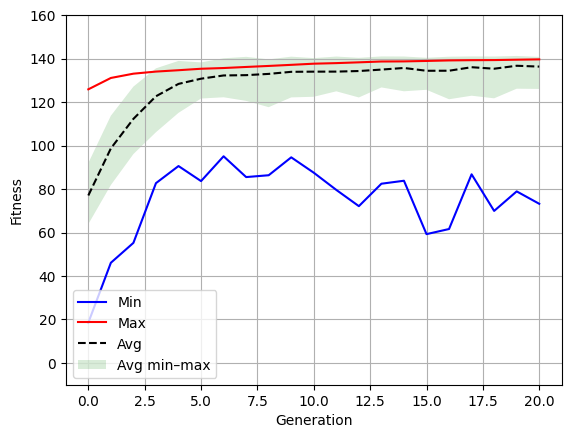

In [43]:
# Necesario para reproducibilidad y para las estadísticas
import math
from deap import algorithms  # 'tools' para Statistics/HallOfFame, 'algorithms' para eaSimple

def main():
    # Fijamos semilla para resultados reproducibles
    # random.seed(42)

    # Probabilidades e iteraciones del algoritmo:
    #  - CXPB: prob. de cruzamiento (crossover probability)
    #  - MUTPB: prob. de mutación (mutation probability)
    #  - NGEN: número de generaciones
    CXPB, MUTPB, NGEN = 0.5, 0.3, 20

    # Creamos población inicial usando la "fábrica" registrada en el toolbox
    # (en tu código anterior registraste population=tools.initRepeat(..., 30))
    pop = toolbox.population()

    # Hall of Fame: mantiene los mejores individuos encontrados (aquí, el mejor)
    hof = toolbox.HallOfFame(1) if hasattr(toolbox, "HallOfFame") else tools.HallOfFame(1)

    # Definimos el objeto de estadísticas: qué métricas se registran por generación
    # La función que recibe Statistics debe mapear individuo -> valor(es) de fitness
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('avg', np.mean)  # promedio del fitness en la población
    stats.register('std', np.std)   # desviación estándar del fitness
    stats.register('min', np.min)   # fitness mínimo
    stats.register('max', np.max)   # fitness máximo

    # Ejecutamos el algoritmo genético "simple" de DEAP:
    #  - pop: población a evolucionar
    #  - toolbox: debe tener registrados evaluate, mate, mutate, select
    #  - cxpb/mutpb: tasas de cruce y mutación
    #  - ngen: número de generaciones
    #  - stats: para recopilar métricas por generación
    #  - halloffame: para mantener el/los mejores
    #  - verbose=True: imprime el progreso por consola
    pop, logbook = algorithms.eaSimple(
        pop, toolbox,
        cxpb=CXPB,
        mutpb=MUTPB,
        ngen=NGEN,
        stats=stats,
        halloffame=hof,
        verbose=False
    )

    # Devolvemos el Hall of Fame (mejores individuos) y el logbook (histórico de stats)
    return hof, logbook


if __name__ == "__main__":

    #Fijamos la semilla
    random.seed(42)

    # Inicializamos la lista de soluciones
    list_mejores = []
    list_best_individuos = []
    logs = []

    #Lanzamos el algoritmo n veces
    for i in range(50):    
        best, log = main()
        logs.append(log)
        list_mejores.append(best[0].fitness.values)
        list_best_individuos.append(best[0])   # guardo individuo, no solo fitness

    # 'best' es un HallOfFame indexable; best[0] es el mejor individuo.
    # OJO: .fitness.values es una TUPLA; hay que indexar [0] si es fitness escalar.
    print(f"mejor fitness: {np.mean(list_mejores):.3f}")

    # El individuo es una lista de reales; imprimimos tal cual o con formato propio
    print(f"mejor individuo: {max(list_mejores)}")

    # Ahora puedo obtener el mejor entre todos
    best_global = max(list_best_individuos, key=lambda ind: ind.fitness.values[0])  # si minimizas
    print("Mejor individuo global:", best_global, "con fitness:", best_global.fitness.values[0])


    # Dibujamos la evolución del fitness a lo largo de las generaciones
    plot_evolucion(logs, fill='minmax')
